# Recipe Suggesting Voicebot
- The aim of this chatbot was discuss cooking and ingredients with the user and help them decide what recipe to make for their dinner party
- The bot users a dataframe of recipes that I have created from scraping various sites
- The final dataframe output includes cuisines that the users requests and any suggested ingredients. 
- For allegies the bot excludes specified ingredients 

#### Graphical outputs
- The bot creates three graphical outputs 
- 1) A word frequency plot - often in text analysis its useful to see the most frequently used words
- 2) A boxplot comparing the users response to a question and a fictitious survey. Compares where the user sits to the sample population
- 3) Sentimnet scores given to each question to allow the analyst to see how negative and positive the user responded to questions

In [87]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
import pickle
import numpy as np
import random
import string # to process standard python strings
import wikipedia
import pandas as pd
from textblob import TextBlob
from newspaper import Article
import requests
import seaborn as sns
from os import path, getcwd
from PIL import Image
from nltk.tokenize import RegexpTokenizer
from bs4 import BeautifulSoup
import requests
import nltk
import re
import seaborn as sns
import wordcloud
from os import path, getcwd
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords 
from bs4 import BeautifulSoup             
import re
import nltk
import warnings
import seaborn as sns
import os
import json
import re
import numpy as np
import pandas as pd
import networkx as nx
from collections import Counter
from collections import defaultdict
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nltk.download('punkt') # first-time use only
nltk.download('wordnet') # first-time use only

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\robert.lowe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\robert.lowe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

________
_________


## Part 1) 
- Creating functions to answer the users response in a conversational way by searching for specific words and creating random recipe responses
- Also creating functions that only select certain words that can then be added to a dictionary


________
_________

In [88]:
def Do_you_like_cooking(x):
    '''A function to find the sentiment of a response and return an output depending on how negative the response was'''
    obj = TextBlob(x)
    sentiment = obj.sentiment.polarity
    if sentiment >=0.55 or 'love' in x:
        print('BOT: Phew! It’s always a relief to talk to a fellow foodie. So I can give the best recommendation for you, can you tell me how many times a week (in the evening) you cook with meat?')
    elif sentiment >-0.2 and sentiment <0.55:
        print("BOT: I wasn't the best cook at first, but practise makes perfect! So I can give the best recommendation for you, can you tell me how many times a week (in the evening) you cook with meat?")

    else:
        print("BOT: Oh don't worry about it, I hated it at first! I can help you pick an easy recipe. So I can give the best recommendation for you, can you tell me how many times a week (in the evening) you cook with meat?")

    

In [89]:
def meat_a_week(string):
    
    '''A function to find certain words in a string and out put a conversational response'''
 
    if '5' in string or 'five'in string  or '6' in string or 'six' in string or '7' in string or 'seven' in string or 'every day' in string or 'all days' in string or 'all the time' in string:
        print("BOT: Ahhh a meat lover. Well I have plenty of recipes in mind with all kinds of meats :). Now, let’s get started. What cuisines do you like to cook?")
        
    elif '4' in string or 'four'in string  or '3' in string or 'three' in string or '2' in string or 'two' in string or '1' in string or 'once' in string or 'a few' in string or 'a couple' in string:
        print("BOT: It’s great to see that you are cutting down on your meat intake, both for health and environmental reasons! Now, let’s get started. What cuisines do you like to cook?")
    elif 'never' in string or 'vegetarian'in string  or 'vegan' in string or 'pescatarian' in string or 'veggie' in string:
        print("BOT: Well I have plenty of recipes that are meatfree! Now, let’s get started. What cuisines do you like to cook?")
        
    else:
        print("BOT: Ok great to know! Now, let’s get started. What cuisines do you like to cook?")


In [90]:
def cuisines(sentence):
    
    '''A function to find words that are in a specific dataframe column and then provide a suggestion of recipes'''
    
    df = pd.read_csv('all_ingred_cuisine.csv')
    Cuisines = df.cuisine.drop_duplicates().tolist()
    cusines_lst = []
    for word in sentence.split():
        if word.lower() in Cuisines:
            cusines_lst.append(word)
    if len(cusines_lst) >1:
        df1 = df[(df['cuisine']==cusines_lst[0]) | (df['cuisine']==cusines_lst[-1])]
        recipes = df1.Title.tolist()
        print('BOT: Yum, I love cooking ' + cusines_lst[0] + ' and '+ cusines_lst[-1] 
              + ', I have few in mind. Here are a couple of examples: '
              + ', '.join(random.sample(recipes, 3))
              + '. If none of these tickle your pickle, I can recommend some more once I know you a little better. Do you have any allergies?')
    elif len(cusines_lst) ==1:
        df2 = df[df['cuisine'] == cusines_lst[0]]
        recipes = df2.Title.tolist()
        print('BOT: Yum, I love cooking ' + cusines_lst[0] + 
                     ' I have few in mind. Here are a couple of examples: ' 
                     + ', '.join(random.sample(recipes, 3)) + 
                     '. If none of these tickle your pickle, I can recommend some more once I know you a little better. Do you have any allergies?')
    else:
        print('BOT: Do you have any allergies?')

In [7]:
def cuisines_append(sentence):
    
    '''A function that only finds words that are in the dataframe column and appends them to a list'''
    
    df = pd.read_csv('all_ingred_cuisine.csv')
    Cuisines = df.cuisine.drop_duplicates().tolist()
    cusines_lst = []
    for word in sentence.split():
        if word.lower() in Cuisines:
            cusines_lst.append(word)
    return(cusines_lst)

In [8]:
cuisines('japanese indian')

BOT: Yum, I love cooking japanese and indian, I have few in mind. Here are a couple of examples: Beetroot curry, Empire roast lamb, Pork tonkatsu & noodles. If none of these tickle your pickle, I can recommend some more once I know you a little better. Do you have any allergies?


In [9]:
cuisines_append('i lovr cooking japanese indian thai and mexican')

['japanese', 'indian', 'thai', 'mexican']

In [10]:
def food_allergies(sentence):
    
    '''A function that finds yes or no and provides a response'''
    
    lst = []
    for word in sentence.split():
        if 'yes' in word:
            print('BOT: Sorry to hear. When I suggest recipes at the end I will avoid those ingredients for you :)' + 
                 'Have you tried replacing your food with alternatives. I have not got round to learning out to replace such recipes but here are some suggestions on this website: https://food.ndtv.com/food-drinks/8-wonderful-substitutes-for-the-most-common-food-allergies-1715139'
                 + 'Will there be any veggies at the dinner party?')
        elif 'no' in word:
            print('BOT: Luck you!' + 'Will there be any veggies at the dinner party?')
        else:
            print('BOT: Will there be any veggies at the dinner party?')
            

In [11]:
def food_allergies_append(sentence, all_unique_ingredients):
    
    '''A function that only finds ingredients that are in the list of ingredients called all_unique_ingredients.
    If the ingredients are in the list it appends them to another list'''
    
    for word in sentence.split():
        if 'yes' in word:
            sentence = clean_text(sentence)
            all_unique_ingredients = [x.lower() for x in all_unique_ingredients]
            lst = ['yes']
            for word in sentence.split():
                if word.lower() in all_unique_ingredients:
                    lst.append(word)
            return lst
        else:
            lst = []
            lst.append('no')
            return lst
            

In [12]:
def veggie(word):
    
    '''A function that finds yes or no and provides a response. If yes veggie recipes are suggested. 
    The output also lists a main component for the user to select'''
    
    df = pd.read_csv('all_ingred_cuisine.csv')
    if 'no' in word:
        recipes = df.Title.tolist()
        print('BOT: Well that makes things a little simpler. I find it much easier to decide what to make when you pick a main component. Please pick one of these as a base for your dish: '
            + ', '.join(df.Meat_and_Poultry.drop_duplicates().tolist()))
    
    elif 'yes' in word:
        df1 = df[(df['Meat_and_Poultry']=='Meatless') & (df['Fish']=='No Fish')]
        recipes = df1.Title.tolist()
        print("BOT: Here are some of my favourite veggie dishes: " +  ', '.join(random.sample(recipes, 3)) 
              + '. If there are any meat eaters in the house, I find it much easier to decide what to make when you pick a main component. Please pick one of these as a base for your dish: '
            + ', '.join(df.Meat_and_Poultry.drop_duplicates().tolist()))
    else:
        print('BOT: I find it much easier to decide what to make when you pick a main component. Please pick one of these as a base for your dish:  '
            + ', '.join(df.Meat_and_Poultry.drop_duplicates().tolist()))
        
        
        


In [13]:
veggie('yes')

BOT: Here are some of my favourite veggie dishes: Middle Eastern roasted sprouts, Cumin roast veg with tahini dressing, Amaretti & sultana cheesecake. If there are any meat eaters in the house, I find it much easier to decide what to make when you pick a main component. Please pick one of these as a base for your dish: chicken, Meatless, lamb, pork, beef, duck


In [14]:
def veggie_response(word):
    df = pd.read_csv('all_ingred_cuisine.csv')
    if 'yes' in word:
        return ['yes','Meatless', 'No Fish'] 
    else:
        return ['no']
     

In [15]:
def main_ingred_sugg(sentence):
    
    '''A function that filters the meat and poutlry column of a dataframe. 
    The output provides a random choice and asks the user how long they have to cook'''
    
    df = pd.read_csv('all_ingred_cuisine.csv')
    main_ingred = df.Meat_and_Poultry.drop_duplicates().tolist()
    main_ingred = [x.lower() for x in main_ingred]
    try:
        lst = []
        for word in sentence.split():
            if word.lower() in main_ingred:
                lst.append(word)
        random_choice = random.choice(lst)
        df = df[df['Meat_and_Poultry'] == random_choice]
        recipes = df.Title.tolist()

        print('BOT: I have a few recipes in mind for recipes with ' +  random_choice + ': ' + ', '.join(random.sample(recipes, 2))
              + 'Just a couple more questions and I can give you the final list. How much time do you have to cook?')
    except:
        print('BOT: Just a couple more questions and I can give you the final list. How much time do you have to cook?')

In [16]:
def main_ingred_append(sentence):
    df = pd.read_csv('all_ingred_cuisine.csv')
    main_ingred = df.Meat_and_Poultry.drop_duplicates().tolist()
    main_ingred = [x.lower() for x in main_ingred]
    lst = []
    for word in sentence.split():
        if word.lower() in main_ingred:
            lst.append(word)
    return lst

In [17]:
def string_prep_time(string):
    
    'Converts a string to minutes. Finds hours and numbers in a string. Returns integars'
    
    list_1 = string.split()

    list_numbers = [i for i in list_1 if i.isdigit()]
    list_numbers = [int(i) for i in list_numbers]
    
    if len(list_numbers) > 1 and 'hour' in list_1:
        hours = (int(list_numbers[0]) * 60)
        minutes = list_numbers[1]
        return(hours + minutes)
    elif len(list_numbers) > 1 and 'hours' in list_1:
        hours = (int(list_numbers[0]) * 60)
        minutes = list_numbers[1]
        return(hours + minutes)

    elif len(list_numbers) == 0 and 'hour' in list_1:
        return(60)
    elif len(list_numbers) == 1 and 'hour' in list_1:
        hours = 60
        minutes = list_numbers[0]
        return(hours + minutes)
    elif len(list_numbers) == 1 and 'hour' not in list_1:
        return(list_numbers[0])


In [54]:
def string_prep_time_append(string):
    
    string = string.replace('once', '1').replace('twice', '2').replace('three', '3').replace('four', '4').replace('five', '5').replace('six','6').replace('seven','7')

    
    'Converts a string to minutes. Finds hours and numbers in a string. Returns string values'
    
    list_1 = string.split()

    list_numbers = [i for i in list_1 if i.isdigit()]
    list_numbers = [int(i) for i in list_numbers]
    
    if len(list_numbers) > 1 and 'hour' in list_1:
        hours = (int(list_numbers[0]) * 60)
        minutes = list_numbers[1]
        time = hours + minutes
        return(str(time))
    elif len(list_numbers) > 1 and 'hours' in list_1:
        hours = (int(list_numbers[0]) * 60)
        minutes = list_numbers[1]
        time = hours + minutes
        return(str(time))

    elif len(list_numbers) == 0 and 'hour' in list_1:
        return('60')
    elif len(list_numbers) == 1 and 'hour' in list_1:
        hours = 60
        minutes = list_numbers[0]
        time = hours + minutes
        return(str(time))
    elif len(list_numbers) == 1 and 'hour' not in list_1:
        time = list_numbers[0]
        return(str(time))


In [67]:
import random


def meatweek_append(string):
    
    string = string.replace('once', '1').replace('twice', '2').replace('three', '3').replace('four', '4').replace('five', '5').replace('six','6').replace('seven','7')

    
    ' Finds numbers in a string. Returns string values'
    
    list_1 = string.split()

    list_numbers = [i for i in list_1 if i.isdigit()]
    list_numbers = [int(i) for i in list_numbers]
    try:
        return max(list_numbers)
    except:
        return random.randint(0,7)


In [68]:
def time_to_cook(string):
    
    '''Users the string_prep_time function to read the string for integar values 
    and provides a response on how big the number is'''
    
    time = string_prep_time(string)
    if int(time) > 5*60:
        print('BOT: Wow you have plenty of time, I wouldnt worry! I will look for recipes that have ' + str(time/60) 
              +' hours or less. Finally, do you have any ingredients in the house?')
    elif int(time) > 2*60:
        print("BOT: That shouldn't be a problem. I will look for recipes that have " + str(time/60) +" hours or less. What ingredients do you like to cook with?")
    elif int(time) > 60:
        print("BOT: Hmmm ok I will look for fast recipes. About " + str(time/60) +" hours or less. What ingredients do you like to cook with?")    
    else:
        print('BOT: Great, I will get searching for fast recipes to make in under an hour! What other ingredients do you like to cook with?')

In [21]:
time_to_cook('I have about an 6 hours and 30 minutes to cook')

BOT: Wow you have plenty of time, I wouldnt worry! I will look for recipes that have 6.5 hours or less. Finally, do you have any ingredients in the house?


In [22]:
def Word_Search_df(x, df):
    '''Searches for strings in the ingredients column of the dataframe'''
    df[x] = df['Ingredients'].str.contains(x, flags=re.IGNORECASE)
    df[x] = df[x].replace(True, 1)
    df[x] = df[x].replace(False, 0)
    return df

In [23]:
def Word_Search(x, df):
    '''Searches for strings in the ingredients column of the dataframe'''
    df[x] = df['Ingredients'].str.contains(x, flags=re.IGNORECASE)
    df[x] = df[x].replace(True, 1)
    df[x] = df[x].replace(False, 0)
    return 

def ingredients_in(list_of_ingredients_in):
    '''Searches for a list of strings in the ingredients column of the dataframe'''
    [Word_Search(ingred) for ingred in list_of_ingredients_in]
    return

In [24]:
### I found a list of ingredients online on a kaggle competition. I deduplicated the list and I use it to search for ingredients

ingreds = pd.read_csv('List_of_Ingredients.csv')

def groupby(x):
    return 1
ingreds['GroupBy'] = ingreds['seperated_ingredients'].apply(groupby)

#concat all strings
List_ingreds = ingreds.groupby(['GroupBy'])['seperated_ingredients'].apply(' '.join)
List_ingreds = pd.concat([List_ingreds], axis =1 )
List_ingreds = List_ingreds[['seperated_ingredients']].reset_index()
List_ingreds = List_ingreds.drop(['GroupBy'], axis=1)

# deduplicate
List_ingreds = List_ingreds.seperated_ingredients.drop_duplicates().tolist()
mylist = " ".join(List_ingreds)
mylist = mylist.split(",")
all_unique_ingredients = list(set(mylist))


In [25]:
def clean_text( text ):
    '''Clean text so the output is faster'''
   
    letters_only = re.sub("[^a-zA-Z]", " ", text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))

In [26]:
def ingredients_prefer(sentence, all_unique_ingredients):
    
    '''Searches for ingredients in all_unique_ingredients. Provides some examples of recipes. 
    
    If pineapple on pizza is suggested an attempt of banter is provided to the user'''
    
    
    df = pd.read_csv('all_ingred_cuisine.csv')
    
    if 'pineapple' and 'pizza' in sentence:
            img=mpimg.imread('Gordon-Ramsay-Pineapple-Pizza-Meme-03.jpg')
            imgplot = plt.imshow(img)
            plt.axis('off')
            plt.show()
    else:
        sentence = clean_text(sentence)
        all_unique_ingredients = [x.lower() for x in all_unique_ingredients]
        lst = []
        for word in sentence.split():
            if word.lower() in all_unique_ingredients:
                lst.append(word)

        random_choice = random.choice(lst)
        df = Word_Search_df(random_choice, df)

        df = df[df[random_choice] == 1]
        recipes = df.Title.tolist()
        word_in_title = []
        for word in recipes:
            if random_choice.lower() in word:
                word_in_title.append(word)
        if len(word_in_title) < 1:
            print("BOT: Yum, "  +  random_choice + "! Great addition."+ ', '.join(random.sample(recipes, 1)) + "is my favourite. Finally, do you have any ingredients already lying about in the house?")
        else:
            print("BOT: Yum, "  +  random_choice + "! Great addition." + word_in_title[0] + "is my favourite. Finally, do you have any ingredients already lying about in the house?")


In [27]:
sentence = 'I really like to cook pork'
ingredients_prefer(sentence, all_unique_ingredients)


BOT: Yum, pork! Great addition.Lemon & chilli sesame pork with mangetoutis my favourite. Finally, do you have any ingredients already lying about in the house?


In [28]:
def ingredients_prefer_append(sentence, all_unique_ingredients):
    
    '''Appends all ingredients to a list'''
    
    df = pd.read_csv('all_ingred_cuisine.csv')
    sentence = clean_text(sentence)
    all_unique_ingredients = [x.lower() for x in all_unique_ingredients]
    lst = []
    for word in sentence.split():
        if word.lower() in all_unique_ingredients:
            lst.append(word)

    return lst

In [29]:
def split(x):
    return x.split(',')

def Check_if_in(df):
    ingredients = [df.Ingredients.count(x) for x in df.Ingredients_inn_split]
    ingredients = [1 if i >=1 else i for i in ingredients]
    return sum(ingredients)



In [30]:
def Whats_in(string):
    '''Final response'''
    print('BOT: I think i’ve got everything I need. I will flag recipes you have in and I will provide a list of recipes is csv file now. Happy cooking!')
     
def Whats_in_append(sentence, all_unique_ingredients):
    
    '''Provides ingredients that the user suggests and appends them to a list'''
    
    df = pd.read_csv('all_ingred_cuisine.csv')
    sentence = clean_text(sentence)
    all_unique_ingredients = [x.lower() for x in all_unique_ingredients]
    lst = []
    for word in sentence.split():
        if word.lower() in all_unique_ingredients:
            lst.append(word)
    return lst

________
_________


## Part 2) # Graphical  output functions
- Creating functions to output graphical analyses


________
_________

In [36]:
def plot_word_freq(Response_toqs):
    
    """Plots word frequency"""
    
    # Joins all values of a dictionary to a string
    combined_responses = ' '.join(str(x) for x in Response_toqs.values())
    tokenizer = RegexpTokenizer('\w+')
    # Create tokens
    tokens = tokenizer.tokenize(combined_responses)
    # Initialize new list
    words = []
    # Loop through list tokens and make lower case
    for word in tokens:
        words.append(word.lower())
    # Get English stopwords and print some of them
    sw = nltk.corpus.stopwords.words('english')
    # Initialize new list
    words_ns = []
    # Add to words_ns all words that are in words but not in sw
    for word in words:
        if word not in sw:
            words_ns.append(word)
            
    # Create freq dist and plot
    freqdist1 = nltk.FreqDist(words_ns)
    freqdist1.plot(25)

In [81]:
def box_plot(response):
    try:
        response = int(response['meat_a_week'])
        '''Opens a fictitious survey and plots two boxplots parallel to one another for comparison'''
        fake = pd.read_csv('Fake_survey_data.csv')
        d = {'Users Response': [response]}
        new = pd.DataFrame(data=d)
        fake = pd.concat([fake, new], axis = 1)
        boxplot = fake.boxplot(column=['Comparison To Average Response', 'Users Response'], grid = False, vert=True)
        plt.ylabel('Range')
        return
    except:
        '''Opens a fictitious survey and plots two boxplots parallel to one another for comparison'''
        fake = pd.read_csv('Fake_survey_data.csv')
        d = {'Users Response': [random.randint(0,7)]}
        new = pd.DataFrame(data=d)
        fake = pd.concat([fake, new], axis = 1)
        boxplot = fake.boxplot(column=['Comparison To Average Response', 'Users Response'], grid = False, vert=True)
        plt.ylabel('Range')
        return
        

In [38]:
def sentiment(text):
    '''Provides a sentiment score for a string'''
    obj = TextBlob(text)
    sentiment = obj.sentiment.polarity
    return([sentiment])

In [39]:
def sentiment_scores(Response_toqs):
    
    '''Creates a barchat that plots each question and its corresponding sentiment score'''
    
    d = {k: sentiment(v) for k, v in Response_toqs.items()}
    new = pd.DataFrame(data=d)
    sentiment_table = new.T.reset_index()
    sentiment_table = sentiment_table.rename(columns={"index": "Survey_Question", 0: "Sentiment_Score"})
    barlist = sentiment_table.plot(kind='bar',x= 'Survey_Question',y='Sentiment_Score',
    color=['green' if row['Sentiment_Score'] >0 else 'red' for name,row in sentiment_table.iterrows()], alpha=0.6, legend=False)

    #plt.rcParams["figure.figsize"] = fig_size
    plt.title('Sentiment Analysis Score for each Question', weight = 'bold', size = 12)
    plt.ylabel('Sentiment Score', weight = 'bold')
    plt.xlabel('Survey Questions')
    plt.show()
    return
    

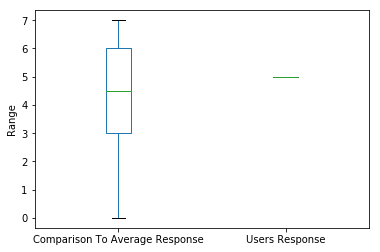

In [76]:
users_responses = {'meat_a_week': 5, 'time': '5'}
box_plot(int(users_responses['meat_a_week']))

______
## Part 3) Output Functions 
- Creating a final dataframe by filtering the users responses 

______

In [40]:
df = pd.read_csv('all_ingred_cuisine.csv')

In [41]:
users_responses = {'cuisines': ['indian', 'japanese'], 'allergy': ['no', 'chicken', 'onion'], 'veggie': ['Meatless', 'No Fish'], 'main_ingred': ['chicken', 'lamb'], 'time': '8', 'ingredients_like': ['onions', 'pasta'], 'Whats_in': ['pasta', 'onions']}

In [42]:
def cuisine_output(users_responses, df):
    
    '''Filters the users response to the question to refine recipes. 
    Reads the values from the dictionary'''
    
    #cuisines
    cuisine = users_responses['cuisines']
    if len(cuisine)>0:
        df['Cusine_response'] = df['cuisine'].isin(cuisine)
        df = df[df['Cusine_response'] == True]
        return df
    else:
        return df
    
    

In [43]:
def main_ingred_output(users_responses, df):
    
    '''Filters the users response to the question to refine recipes. 
    Reads the values from the dictionary'''
    
    main_ingred = users_responses['main_ingred'] 
    if len(main_ingred)>0:
        df['Meat_and_Poultry_response'] = df['Meat_and_Poultry'].isin(main_ingred)
        return df
    else:
        return df

In [44]:
def Word_Search_df(x,df):
    df[x] = df['Ingredients'].str.contains(x, flags=re.IGNORECASE)
    return df

In [45]:
def Word_Search_df_filter(x, df):
    df[x] = df['Ingredients'].str.contains(x, flags=re.IGNORECASE)
    df = df[df[x] == False]
    return df

In [46]:
def ingredients_like_output(users_responses, df):
    
    '''Filters the users response to the question to refine recipes. 
    Reads the values from the dictionary'''
    
    #ingredients
    ingredients_like = users_responses['ingredients_like'] 
    if len(ingredients_like)>0:
        for x in ingredients_like:
            Word_Search_df(x,df)
        return df
    else:
        return df

In [47]:
def allergy_output(users_responses, df):
    
    '''Filters the users response to the question to refine recipes. 
    Reads the values from the dictionary'''
    
    
    #Allergy
    allergy = users_responses['allergy'][1:]
    if len(allergy)>0:
        for x in allergy:
            df = Word_Search_df_filter(x, df)

        return df
    else:
        return df

In [48]:
def veggie_output(users_responses, df):
    
    '''Filters the users response to the question to refine recipes. 
    Reads the values from the dictionary'''
    
    veggie = users_responses['veggie']
    if 'yes' in veggie:
        df = df[(df['Meat_and_Poultry']=='Meatless') & (df['Fish']=='No Fish')]
        return df
    else:
        return df

In [49]:
def time_output(users_responses, df):
    
    '''Filters the users response to the question to refine recipes. 
    Reads the values from the dictionary'''
    
    time = users_responses['time']
    time = int(time)
    df = df[df['Cook Time'] <= time]
    return df

In [50]:
def Whats_in_output(users_responses, df):
    
    '''Filters the users response to the question to refine recipes. 
    Reads the values from the dictionary'''
    
    
    Whats_in = users_responses['Whats_in'] 
    if len(Whats_in)>0:
        for x in Whats_in:
            Word_Search_df(x,df)
        df.to_csv("test_recipe_suggestions.csv")

        return df.head()
    else:
        df.to_csv("test_recipe_suggestions.csv")
        return df.head()
        

In [51]:
def final_output(df):
    
    '''Filters the users response to the question to refine recipes. 
    Reads the values from the dictionary'''
    
    
    df = pd.read_csv('all_ingred_cuisine.csv')
    df = cuisine_output(users_responses, df)
    df = allergy_output(users_responses, df)
    df = veggie_output(users_responses, df)
    df = main_ingred_output(users_responses, df)
    df = ingredients_like_output(users_responses, df)
    df = Whats_in_output(users_responses, df)
    try:
        df = time_output(users_responses, df)
        return df
    except:
        return df

_____


# Part 4 - Chatbot


____


BOT: Hello there! I am MealMaster, a recipe recommendation bot, here to help you decide what recipe to master. I’ll use your answers to improve my recommendations to other budding chefs. Clever, huh? Looks like you have chosen Dinner Party as your meal occasion. Let’s start with a ‘temperature check'. How much do you enjoy cooking?


 I love cooking. Highlight of my night. I have tonns of cookbooks and I love hosting dinner parties for friends. :)


BOT: Phew! It’s always a relief to talk to a fellow foodie. So I can give the best recommendation for you, can you tell me how many times a week (in the evening) you cook with meat?


 I probably cook 5 times a week. I try to cut down on my intake of meat, but if I am honest I love it too much


BOT: Ahhh a meat lover. Well I have plenty of recipes in mind with all kinds of meats :). Now, let’s get started. What cuisines do you like to cook?


 I love them all but I tend to cook indian and mexican to dinner parties, so I will probably stick to that. Although if I find the right recipe I would like to cook japanese or thai or italian. The list goes on


BOT: Yum, I love cooking indian and thai, I have few in mind. Here are a couple of examples: The best aloo gobi, Chicken tikka skewers, Roast aubergine & coconut curry. If none of these tickle your pickle, I can recommend some more once I know you a little better. Do you have any allergies?


 No


BOT: Luck you!Will there be any veggies at the dinner party?


 No. Not that I am aware of. I can always change the ingredients slightly


BOT: Well that makes things a little simpler. I find it much easier to decide what to make when you pick a main component. Please pick one of these as a base for your dish: chicken, Meatless, lamb, pork, beef, duck


 I tend to only cook chicken, pork and meatless dishes


BOT: Just a couple more questions and I can give you the final list. How much time do you have to cook?


 I have about an hour to cook on Friday once I have finished work


BOT: Great, I will get searching for fast recipes to make in under an hour! What other ingredients do you like to cook with?


 To name a few I love cooking with paneer, fresh tomatoes, definitely with cream. I would like to look at some fish dishes with prawns in also


BOT: Yum, cream! Great addition.Pears in port with meringue creamis my favourite. Finally, do you have any ingredients already lying about in the house?


  I have some pasta, rice, cheese, paneer and fresh parsley


BOT: I think i’ve got everything I need. I will flag recipes you have in and I will provide a list of recipes is csv file now. Happy cooking!


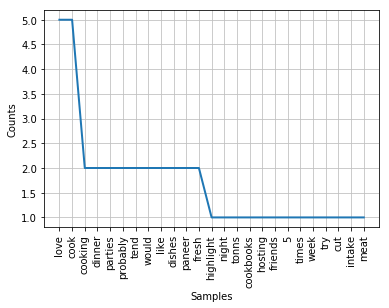

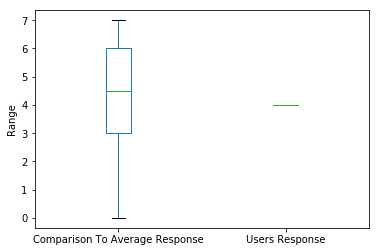

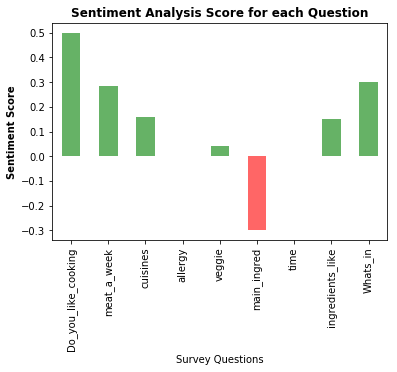

,Unnamed: 0,cuisine,Title,Ingredients,Number of ingredients,Link,Serving,Cook Time,Fish,Meat_and_Poultry,...,paneer,fresh,tomatoes,cream,fish,prawns,pasta,rice,cheese,parsley
0,0,indian,Mob's Chicken Katsu Burger,"4 brioche baps, 1 bunch of coriander, 2 eggs, ...",20,http://www.mobkitchen.co.uk/recipes/mobs-chick...,4,30.0,No Fish,chicken,...,False,False,False,False,False,False,False,False,False,False
1,1,indian,Creamy Cashew & Coconut Vegan Korma,"tablespoon of agave nectar, crushed chillies, ...",19,http://www.mobkitchen.co.uk/recipes/creamy-cas...,4,61.0,No Fish,Meatless,...,False,False,False,False,False,False,False,True,False,False
2,2,indian,Big Boy Bhaji Burger,"3 red onions, cumin seeds, ground coriander, g...",17,http://www.mobkitchen.co.uk/recipes/big-boy-bh...,4,30.0,No Fish,Meatless,...,False,True,False,False,False,False,False,False,False,False
3,3,mexican,Vegan Chocolate Chilli,"2 garlic cloves, 1 red onion, 2 peppers (not g...",17,http://www.mobkitchen.co.uk/recipes/vegan-choc...,4,50.0,No Fish,Meatless,...,False,False,True,False,False,False,False,True,False,False
5,5,thai,The Freshest Thai Red Prawn Curry,"200g of frozen prawns, 1 brown onion, coriande...",17,http://www.mobkitchen.co.uk/recipes/the-freshe...,4,30.0,Prawn,Meatless,...,False,False,True,False,False,True,False,True,False,False


In [83]:
print("BOT: Hello there! I am MealMaster, a recipe recommendation bot, here to help you decide what recipe to master. I’ll use your answers to improve my recommendations to other budding chefs. Clever, huh? Looks like you have chosen Dinner Party as your meal occasion. Let’s start with a ‘temperature check'. How much do you enjoy cooking?")
Response_toqs =  {}
users_responses = {}

# Do_you_like_cooking
user_response = input()
user_response=user_response.lower()
Response_toqs.update({'Do_you_like_cooking' :user_response})
if(Do_you_like_cooking(user_response)!=None):
    print("ROBO: "+Do_you_like_cooking(user_response))

# meat_a_week
user_response = input()
user_response=user_response.lower()
users_responses.update({'meat_a_week' :meatweek_append(user_response)})
Response_toqs.update({'meat_a_week' :user_response})
if(meat_a_week(user_response)!=None):
    print("ROBO: "+meat_a_week(user_response))

# cuisine
users_responses = {}
user_response = input()
user_response=user_response.lower()
users_responses.update({'cuisines' :cuisines_append(user_response)})
Response_toqs.update({'cuisines' :user_response})
if(cuisines(user_response)!=None):
    print("ROBO: "+cuisines(user_response))

# allergy
user_response = input()
user_response=user_response.lower()
users_responses.update({'allergy' :food_allergies_append(user_response, all_unique_ingredients)})
Response_toqs.update({'allergy' :user_response})
if(food_allergies(user_response)!=None):
    print("ROBO: "+food_allergies(user_response))

    
#veggie
user_response = input()
user_response=user_response.lower()
users_responses.update({'veggie' :veggie_response(user_response)})
Response_toqs.update({'veggie' :user_response})
if(veggie(user_response)!=None):
    print(veggie(user_response))
        
#main_ingred
user_response = input()
user_response=user_response.lower()
users_responses.update({'main_ingred' :main_ingred_append(user_response)})
Response_toqs.update({'main_ingred' :user_response})

if(main_ingred_sugg(user_response)!=None):
    print(main_ingred_sugg(user_response))

#time
user_response = input()
user_response=user_response.lower()
users_responses.update({'time' :string_prep_time_append(user_response)})
Response_toqs.update({'time' :user_response})
if(time_to_cook(user_response)!=None):
    print(time_to_cook(user_response))

# ingredients you like
user_response = input()
user_response=user_response.lower() 
users_responses.update({'ingredients_like' :ingredients_prefer_append(user_response, all_unique_ingredients)})
Response_toqs.update({'ingredients_like' :user_response})
if(ingredients_prefer(user_response, all_unique_ingredients)!=None):
    print(ingredients_prefer(user_response, all_unique_ingredients))
    
# What you have in the fridge/ cupbaord
user_response = input()
user_response=user_response.lower()
users_responses.update({'Whats_in' :Whats_in_append(user_response,all_unique_ingredients)})
Response_toqs.update({'Whats_in' :user_response})
if(Whats_in(user_response)!=None):
    print(Whats_in(user_response))


#print(users_responses)
#print(Response_toqs)

plot_word_freq(Response_toqs)
box_plot(users_responses)
sentiment_scores(Response_toqs)
final_output(df)